In [ ]:
!pip install -q google-cloud-bigquery

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import bigquery
import pandas as pd


client = bigquery.Client(project='academic-elixir-439605-n3')

In [ ]:
query = """
SELECT
    image_path
FROM
    `academic-elixir-439605-n3.flight.train_metadata`
WHERE
    location = 'neighbourhood'
    AND fog > 0
LIMIT 1
"""

df = client.query(query).to_dataframe()
df

,image_path
0,gs://data_298a_dataset/DATA 298 A project/Fina...


In [ ]:
query = """
    SELECT *
    FROM `academic-elixir-439605-n3.flight.train_metadata`
    WHERE RAND() < 0.01
    LIMIT 100000
"""


df = client.query(query).to_dataframe()
df.head()

,flight_id,dataset,location,timestamp,image_file,image_path,depth_path,segmentation_path,flow_path,surface_normals_path,...,angular_acceleration_x,angular_acceleration_y,angular_acceleration_z,rain,roadwetness,snow,roadsnow,mapleleaf,dust,fog
0,1,train,neighbourhood,1708276104579598080,93.png,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,...,-3.295216,0.134196,-0.999237,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,train,neighbourhood,1708276104588598272,29.png,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,...,-2.314361,0.084184,-1.038364,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,train,neighbourhood,1708276104588598272,45.png,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,...,-2.314361,0.084184,-1.038364,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,train,neighbourhood,1708276104597598464,3.png,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,...,-1.999286,0.021966,-1.119990,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,train,neighbourhood,1708276104597598464,32.png,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,...,-1.999286,0.021966,-1.119990,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.describe()

,flight_id,timestamp,timestamp_1,img_index,drone_pose_x,drone_pose_y,drone_pose_z,drone_orientation_w,drone_orientation_x,drone_orientation_y,...,angular_acceleration_x,angular_acceleration_y,angular_acceleration_z,rain,roadwetness,snow,roadsnow,mapleleaf,dust,fog
count,100000.0,100000.0,100000.0,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,71.23958,1708352131487220480.0,1708352131487220480.0,4.09174,1.606876,13.729930,-11.295329,0.604523,-0.001587,-0.039287,...,0.007457,0.020438,0.024127,0.015503,0.037322,0.080343,0.083469,0.001160,0.013708,0.015639
std,71.532975,77955180537515.34375,77955180537515.34375,17.72511,77.666237,81.690412,3.413860,0.313291,0.128613,0.128144,...,10.897318,9.076429,2.345431,0.096274,0.155472,0.247883,0.243688,0.012363,0.098070,0.088718
min,0.0,1708276059395634176.0,1708276059395634176.0,-1.0,-172.079056,-174.164337,-21.304558,-0.070593,-0.376206,-0.379458,...,-141.418259,-154.479446,-7.682022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.0,1708279384099559680.0,1708279384099559680.0,-1.0,-53.411667,-43.314053,-13.760966,0.326195,-0.061103,-0.104969,...,-0.520869,-0.245636,-0.610135,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.0,1708286008336873728.0,1708286008336873728.0,-1.0,11.014219,23.067546,-11.492371,0.685390,-0.001361,-0.028725,...,0.001571,-0.017875,0.001130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,99.0,1708436705030606592.0,1708436705030606592.0,-1.0,57.201659,79.166908,-8.969328,0.901031,0.059034,0.009694,...,0.580370,0.144849,0.740374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,249.0,1708437303723378432.0,1708437303723378432.0,99.0,184.926224,183.128372,-2.448147,0.999741,0.361040,0.368041,...,159.814056,142.623108,7.661304,0.848988,1.000000,1.000000,1.000000,0.132978,0.964182,0.672121


In [ ]:
print("Data Information:")
df.info()
df.head()

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   flight_id               100000 non-null  Int64  
 1   dataset                 100000 non-null  object 
 2   location                100000 non-null  object 
 3   timestamp               100000 non-null  Int64  
 4   image_file              100000 non-null  object 
 5   image_path              100000 non-null  object 
 6   depth_path              100000 non-null  object 
 7   segmentation_path       100000 non-null  object 
 8   flow_path               100000 non-null  object 
 9   surface_normals_path    100000 non-null  object 
 10  weather_condition       0 non-null       object 
 11  timestamp_1             100000 non-null  Int64  
 12  img_index               100000 non-null  Int64  
 13  drone_pose_x            100000 non-null  float64
 14  dro

,flight_id,dataset,location,timestamp,image_file,image_path,depth_path,segmentation_path,flow_path,surface_normals_path,...,angular_acceleration_x,angular_acceleration_y,angular_acceleration_z,rain,roadwetness,snow,roadsnow,mapleleaf,dust,fog
0,0,train,neighbourhood,1708276059587638272,32.png,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,...,-9.122473,-0.751647,0.511194,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,train,neighbourhood,1708276059587638272,70.png,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,...,-9.122473,-0.751647,0.511194,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,train,neighbourhood,1708276059683640320,2.png,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,...,-3.079381,0.109360,-0.948224,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,train,neighbourhood,1708276059683640320,35.png,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,...,-3.079381,0.109360,-0.948224,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,train,neighbourhood,1708276059683640320,54.png,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,gs://data_298a_dataset/DATA 298 A project/Fina...,...,-3.079381,0.109360,-0.948224,0.0,0.0,0.0,0.0,0.0,0.0,0.0


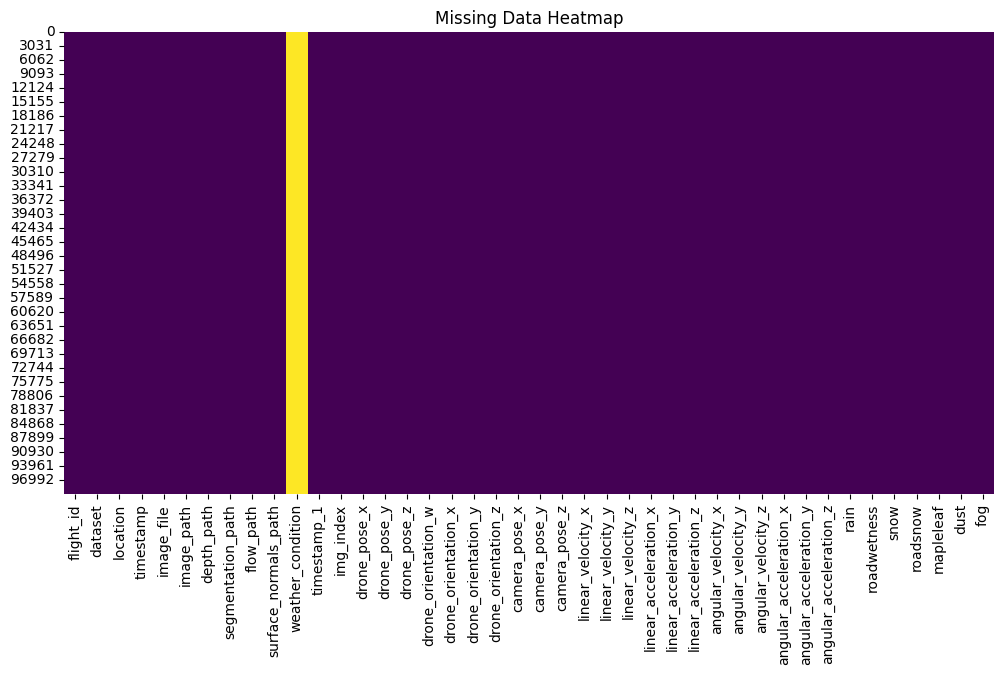

Missing Values per Column:
weather_condition    100000
dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

# Display the total count of missing values per column
missing_data = df.isnull().sum()
print("Missing Values per Column:")
print(missing_data[missing_data > 0].sort_values(ascending=False))

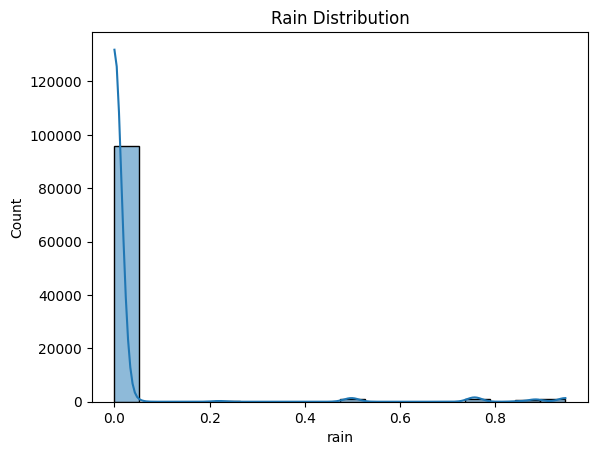

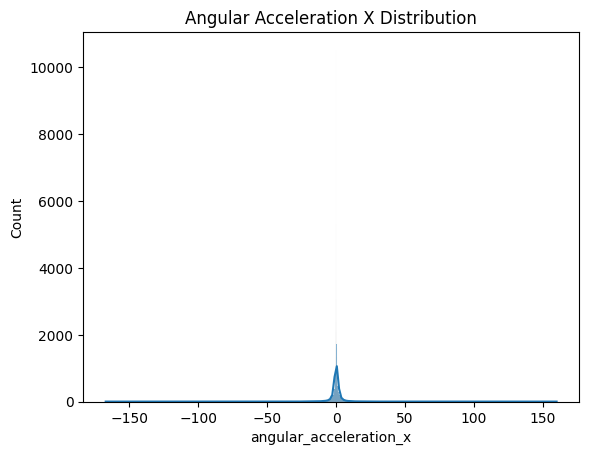

In [ ]:
# Plot distribution of 'rain' column
sns.histplot(df['rain'], kde=True)
plt.title('Rain Distribution')
plt.show()

# Plot distribution of 'angular_acceleration_x'
sns.histplot(df['angular_acceleration_x'], kde=True)
plt.title('Angular Acceleration X Distribution')
plt.show()

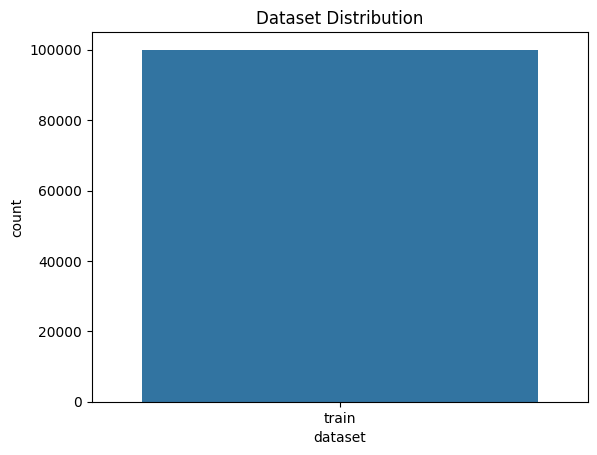

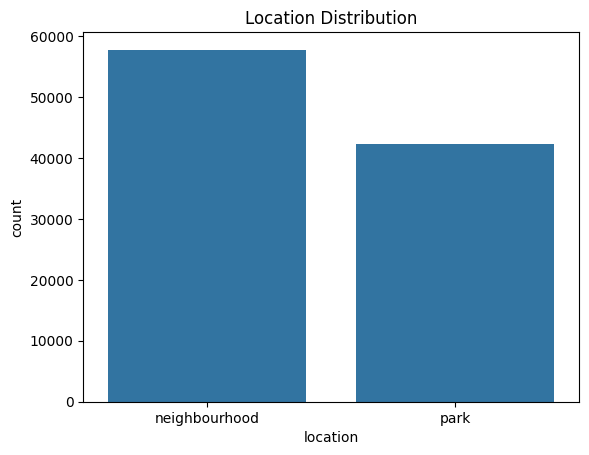

In [ ]:
# Dataset distribution
sns.countplot(data=df, x='dataset')
plt.title('Dataset Distribution')
plt.show()

# Location distribution
sns.countplot(data=df, x='location')
plt.title('Location Distribution')
plt.show()

Records with environmental conditions (rain, fog, snow):
               rain           fog          snow
count  14769.000000  14769.000000  14769.000000
mean       0.206229      0.059205      0.611715
std        0.345009      0.121566      0.397800
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.228762
50%        0.000000      0.000000      0.637259
75%        0.500069      0.087377      1.000000
max        0.947709      0.631377      1.000000


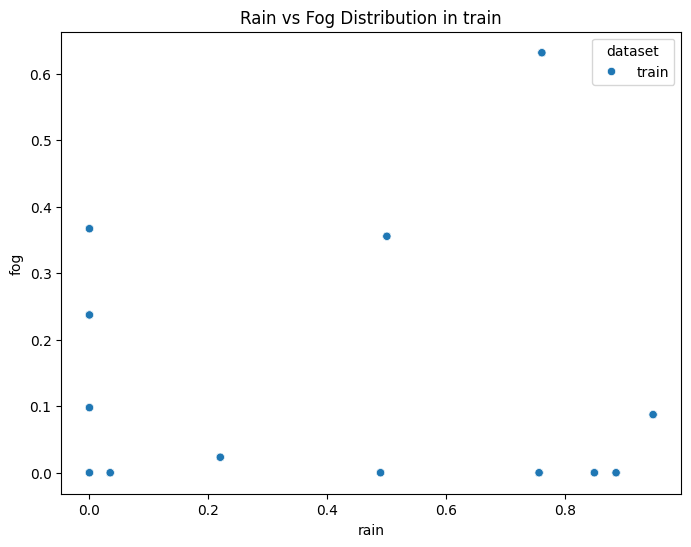

In [ ]:
# Filter for records where there was rain, fog, or snow
env_conditions = df[(df['rain'] > 0) | (df['fog'] > 0) | (df['snow'] > 0)]

# Count of records with rain, fog, or snow
print("Records with environmental conditions (rain, fog, snow):")
print(env_conditions[['rain', 'fog', 'snow']].describe())

# Visualize rain vs. fog for records with environmental conditions
plt.figure(figsize=(8, 6))
sns.scatterplot(data=env_conditions, x='rain', y='fog', hue='dataset')
plt.title("Rain vs Fog Distribution in train")
plt.show()

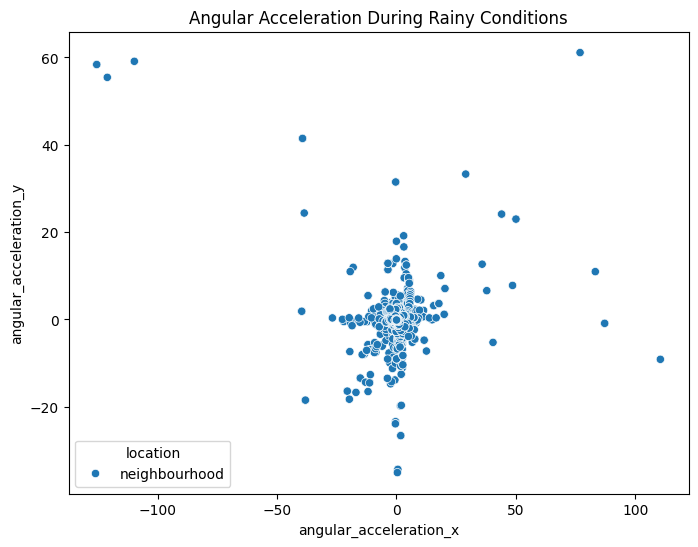

In [ ]:
# Filter for records with rain > 0 and analyze angular acceleration during these events
rainy_conditions = df[df['rain'] > 0]

# Scatter plot of angular acceleration during rainy conditions
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rainy_conditions, x='angular_acceleration_x', y='angular_acceleration_y', hue='location')
plt.title("Angular Acceleration During Rainy Conditions")
plt.show()


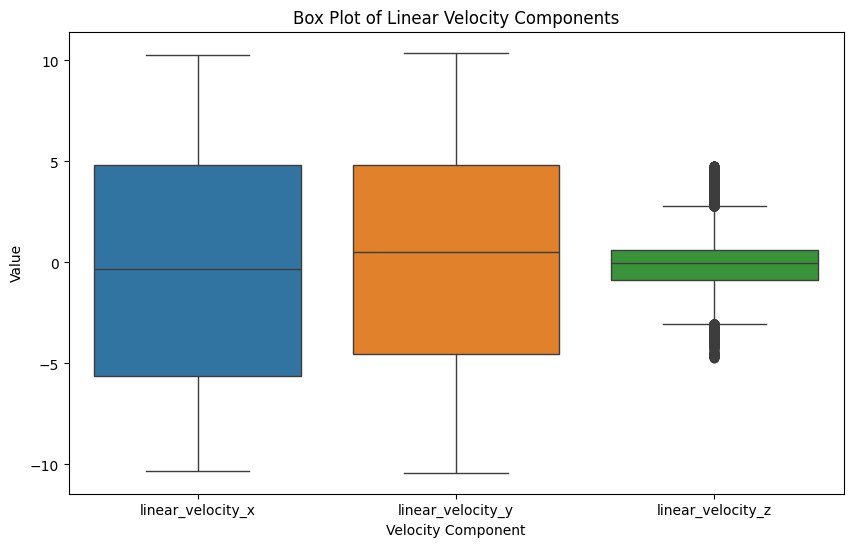

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['linear_velocity_x', 'linear_velocity_y', 'linear_velocity_z']])
plt.title("Box Plot of Linear Velocity Components")
plt.xlabel("Velocity Component")
plt.ylabel("Value")
plt.show()

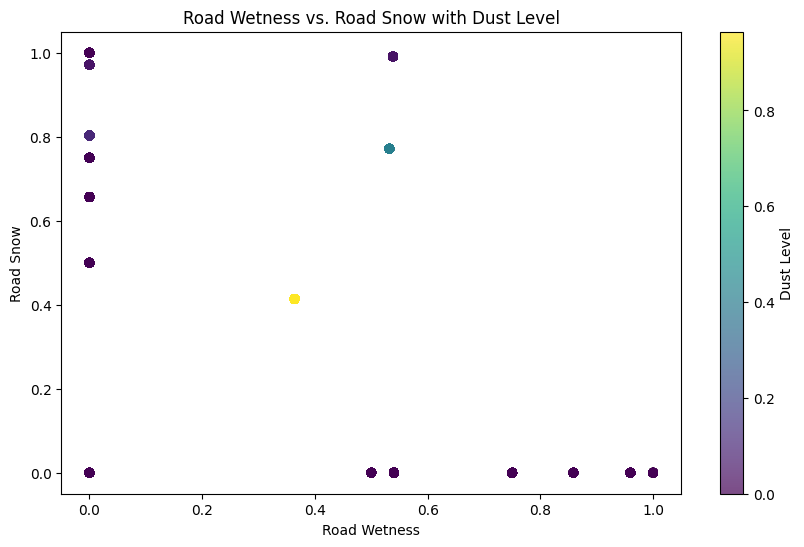

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['roadwetness'], df['roadsnow'], c=df['dust'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Dust Level')
plt.title("Road Wetness vs. Road Snow with Dust Level")
plt.xlabel("Road Wetness")
plt.ylabel("Road Snow")
plt.show()